# House Price Prediction

This dataset contains house sale prices for King County, Seattle. It includes homes sold between May 2014 and May 2015.

**Columns Description**

- id - a notation for a house
- date - Date house was sold
- price - Price is prediction target
- bedrooms - Number of Bedrooms/House
- bathrooms - Number of bathrooms/House
- sqft_living - square footage of the home
- sqft_lot - square footage of the lot
- floors - Total floors (levels) in house
- waterfront - House which has a view to a waterfront
- view - Has a view or not
- condition - How good the condition is ( Overall )
- grade - overall grade given to the housing unit, based on King County grading system
- sqft_above - square footage of house apart from basement
- sqft_basement - square footage of the basement
- yr_built - Built Year
- yr_renovated - Year when house was renovated
- zipcode - zip
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
- sqft_lot15 - lotSize area in 2015(implies-- some renovations)

### Step1 : Load the dataset

### Step 2: Select few variables for analysis

Creat a new dataframe with only the following selected variables

- price
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- sqft_above
- sqft_above
- sqft_living15
- sqft_lot15

### Step 4: Create a heatmap to understand which variables are highly correlated with price

### Step 5: Set X and Y Variables

Note: We are going to build a linear model to predict the price of the house using other variables

- *price* will Y variable.
- All other variables will be X variables.

### Step 6: Split the dataset: 80% as training and 20% as test set

Note: Use random state as 100

### Step 7: Verify the R-squared for linear model using K Fold Cross Validation

Note: Use k=10

### Step 8: Build a linear regression model using training set

### Step 9: Predict price on test set

### Step 10: Calculate RMSE

### Step 11: Save the model into a file

### Step1 : Load the dataset

In [2]:
import pandas as pd

In [3]:
house_df = pd.read_csv('../data/kc_house_data.csv')

### Step 2: Select few variables for analysis
Creat a new dataframe with only the following selected variables

- price
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- sqft_above
- sqft_above
- sqft_living15
- sqft_lot15

In [4]:
house_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
h_df_v1 = pd.DataFrame(house_df, columns = ['price','bedrooms', 'bathrooms', 'sqft_living',
                                            'sqft_lot', 'floors', 'sqft_above', 'sqft_living15', 'sqft_lot15'])

In [12]:
h_df_v1.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,1800,7503


### Step 4: Create a heatmap to understand which variables are highly correlated with price

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn

In [15]:
corr_mat = h_df_v1[['price','bedrooms', 'bathrooms', 'sqft_living',
                    'sqft_lot', 'floors', 'sqft_above', 'sqft_living15', 'sqft_lot15']].corr()

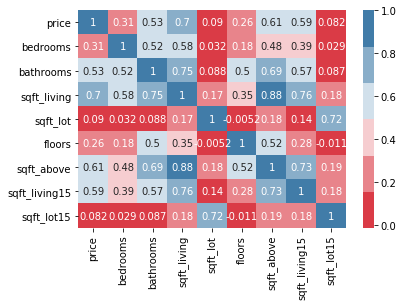

In [16]:
sn.heatmap(corr_mat,
          annot = True,
          cmap = sn.diverging_palette(10,240));

### Step 5: Set X and Y Variables

In [20]:
X = h_df_v1[['bedrooms', 'bathrooms', 'sqft_living',
             'sqft_lot', 'floors', 'sqft_above', 'sqft_living15', 'sqft_lot15']]
Y = h_df_v1.price

### Step 6: Split the dataset: 80% as training and 20% as test set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, \
Y_train, Y_test = train_test_split(X,
                                   Y,
                                  train_size = 0.8,
                                  random_state = 100)    

In [23]:
X_train.shape

(17290, 8)

In [24]:
X_test.shape

(4323, 8)

In [25]:
X_train[0:5]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15
16000,3,1.75,1780,11096,1.0,1210,1780,10640
11286,2,2.50,1420,2229,2.0,1420,1500,2230
3201,2,1.00,1790,4000,1.0,1040,1310,4000
11049,4,1.00,1710,117176,1.5,1710,1940,12223
9716,4,1.00,1150,5217,1.5,1150,1220,5217


### Step 7: Verify the R-squared for linear model using K Fold Cross Validation

### Step 8: Build a linear regression model using training set

### Step 9: Predict price on test set

### Step 10: Calculate RMSE

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

In [44]:
scores = cross_val_score(LinearRegression(),
                        X_train,
                        Y_train,
                        cv = 10,
                        scoring = 'r2')

In [45]:
scores

array([0.51728957, 0.47980955, 0.52980929, 0.5193453 , 0.51105203,
       0.53322514, 0.53662965, 0.51559514, 0.47116591, 0.48421842])

In [46]:
scores.std()

0.02213082036778872

In [47]:
scores.mean()

0.5098139988004211

In [48]:
lreg_v1 = LinearRegression()

In [49]:
lreg_v1.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
dict(zip(X_train.columns,
   lreg_v1.coef_))

{'bedrooms': -56489.17264923307,
 'bathrooms': 3796.0098129999765,
 'sqft_living': 310.34423980084705,
 'sqft_lot': 0.034556046685338515,
 'floors': 18396.584419706953,
 'sqft_above': -50.28377580677795,
 'sqft_living15': 72.16792989663395,
 'sqft_lot15': -0.78706390758407}

In [51]:
Y_pred = lreg_v1.predict(X_test)

In [52]:
h_df_v2 = pd.DataFrame({"actual": Y_test,
                        "predicted": Y_pred,
                        "residual": Y_test - Y_pred})

In [53]:
mse_v2 = mean_squared_error(h_df_v2.actual, h_df_v2.predicted)

In [54]:
rmse_v2 = np.sqrt( mse_v2 )

In [55]:
rmse_v2

247835.5200849055

In [56]:
r2_score(h_df_v2.actual, h_df_v2.predicted)

0.5442394170723382

### Step 11: Save the model into a file

In [59]:
from sklearn.externals import joblib

In [60]:
joblib.dump(lreg_v1, 'house_pred.pkl')

['house_pred.pkl']